<a href="https://colab.research.google.com/github/Petegichana/Machine-Learning-Algorithms/blob/main/K_meansClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
#unsupervised learning
#clustering - KMeans
#ML -> AI

#AI - ability of machines,models, computers to aquire human like intelligence
#learn, visualise(computer visiom), make decisions(predictive analysis), recognise speech(NLP, speech recognision)

#ML - ability of machine to learn from data. in data science we are trying to get insights from data
#supervised learning(SL) and unsupervised learning(UL)

#SL- Labeled data(Y,outcome, dependant), UL(getting patterns, trends(x))

In [74]:
import pandas
data = pandas.read_csv('http://modcom.co.ke/bigdata/datasets/AirlinesCluster.csv')
data

,Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll
0,28143,0,174,1,0,0,7000
1,19244,0,215,2,0,0,6968
2,41354,0,4123,4,0,0,7034
3,14776,0,500,1,0,0,6952
4,97752,0,43300,26,2077,4,6935
...,...,...,...,...,...,...,...
3994,18476,0,8525,4,200,1,1403
3995,64385,0,981,5,0,0,1395
3996,73597,0,25447,8,0,0,1402
3997,54899,0,500,1,500,1,1401


In [75]:
#stat
data.describe()

,Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll
count,3.999000e+03,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000
mean,7.360133e+04,144.114529,17144.846212,11.60190,460.055764,1.373593,4118.55939
std,1.007757e+05,773.663804,24150.967826,9.60381,1400.209171,3.793172,2065.13454
min,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,2.00000
25%,1.852750e+04,0.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000
50%,4.309700e+04,0.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000
75%,9.240400e+04,0.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000
max,1.704838e+06,11148.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000


In [76]:
data.isnull().sum()

Balance            0
QualMiles          0
BonusMiles         0
BonusTrans         0
FlightMiles        0
FlightTrans        0
DaysSinceEnroll    0
dtype: int64

In [77]:
miles = data['FlightMiles']
miles

0          0
1          0
2          0
3          0
4       2077
        ... 
3994     200
3995       0
3996       0
3997     500
3998       0
Name: FlightMiles, Length: 3999, dtype: int64

In [78]:
miles.mean()

460.05576394098523

In [79]:
trans=data['FlightTrans']
trans

0       0
1       0
2       0
3       0
4       4
       ..
3994    1
3995    0
3996    0
3997    1
3998    0
Name: FlightTrans, Length: 3999, dtype: int64

In [80]:
trans.mean()

1.3735933983495874

In [81]:
days=data['DaysSinceEnroll']
days

0       7000
1       6968
2       7034
3       6952
4       6935
        ... 
3994    1403
3995    1395
3996    1402
3997    1401
3998    1398
Name: DaysSinceEnroll, Length: 3999, dtype: int64

In [82]:
days.mean()

4118.559389847462

In [83]:
data[['FlightMiles','FlightTrans','DaysSinceEnroll']].mean()

FlightMiles         460.055764
FlightTrans           1.373593
DaysSinceEnroll    4118.559390
dtype: float64

In [84]:
data.corr()

,Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll
Balance,1.000000,0.108722,0.403487,0.324935,0.217551,0.255700,0.263129
QualMiles,0.108722,1.000000,0.031021,0.050725,0.126774,0.144004,0.017312
BonusMiles,0.403487,0.031021,1.000000,0.603180,0.183536,0.185261,0.210397
BonusTrans,0.324935,0.050725,0.603180,1.000000,0.377216,0.432364,0.161262
FlightMiles,0.217551,0.126774,0.183536,0.377216,1.000000,0.869193,0.037271
FlightTrans,0.255700,0.144004,0.185261,0.432364,0.869193,1.000000,0.059260
DaysSinceEnroll,0.263129,0.017312,0.210397,0.161262,0.037271,0.059260,1.000000


In [85]:
#clustering -Kmean
#get the values

array=data.values
array

array([[28143,     0,   174, ...,     0,     0,  7000],
       [19244,     0,   215, ...,     0,     0,  6968],
       [41354,     0,  4123, ...,     0,     0,  7034],
       ...,
       [73597,     0, 25447, ...,     0,     0,  1402],
       [54899,     0,   500, ...,   500,     1,  1401],
       [ 3016,     0,     0, ...,     0,     0,  1398]])

In [86]:
X = array[:, 4:7]
X
#no Y

array([[   0,    0, 7000],
       [   0,    0, 6968],
       [   0,    0, 7034],
       ...,
       [   0,    0, 1402],
       [ 500,    1, 1401],
       [   0,    0, 1398]])

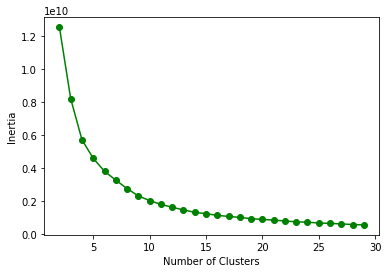

In [87]:
#elbow method-> to get the accurate number of clusters
from sklearn.cluster import KMeans
#inertias
inertias=[]
for k in range(2,30):
  kmeans= KMeans(n_clusters=k)
  kmeans.fit(X)
  inertias.append(kmeans.inertia_)

import matplotlib.pyplot as plt
plt.plot(range(2,30), inertias, "o-g")
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [88]:
#MACHINE LEARNING
#KMean -groups data based on average mean
#number of clusters we need from the data, random state functions

model = KMeans(n_clusters=10, random_state=42)
y_clusters = model.fit_predict(X)

In [89]:
#centronoids - cluster means that we have 
centronoids = model.cluster_centers_
centronoids

array([[1.32655431e+02, 4.94382022e-01, 5.85089638e+03],
       [1.36921087e+02, 5.20051746e-01, 2.72466753e+03],
       [1.92594655e+02, 7.10467706e-01, 7.47161693e+03],
       [6.28290000e+03, 1.63750000e+01, 6.27415000e+03],
       [2.64585000e+04, 4.90000000e+01, 2.60200000e+03],
       [3.34517647e+03, 8.73109244e+00, 2.49315126e+03],
       [2.36594231e+03, 7.61538462e+00, 5.96384615e+03],
       [1.66997735e+02, 6.13816535e-01, 4.25539071e+03],
       [1.08346818e+04, 2.32727273e+01, 3.31677273e+03],
       [1.11370027e+02, 4.53580902e-01, 1.33810743e+03]])

In [90]:
means= pandas.DataFrame(centronoids, columns = ['FlightMiles', 'FlightTrans', 'DaysSinceEnrol'])
means

,FlightMiles,FlightTrans,DaysSinceEnrol
0,132.655431,0.494382,5850.896380
1,136.921087,0.520052,2724.667529
2,192.594655,0.710468,7471.616927
3,6282.900000,16.375000,6274.150000
4,26458.500000,49.000000,2602.000000
5,3345.176471,8.731092,2493.151261
6,2365.942308,7.615385,5963.846154
7,166.997735,0.613817,4255.390713
8,10834.681818,23.272727,3316.772727
9,111.370027,0.453581,1338.107427


In [91]:
#getting members of a cluster(means)
data['Label']=model.labels_
data

,Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll,Label
0,28143,0,174,1,0,0,7000,2
1,19244,0,215,2,0,0,6968,2
2,41354,0,4123,4,0,0,7034,2
3,14776,0,500,1,0,0,6952,2
4,97752,0,43300,26,2077,4,6935,6
...,...,...,...,...,...,...,...,...
3994,18476,0,8525,4,200,1,1403,9
3995,64385,0,981,5,0,0,1395,9
3996,73597,0,25447,8,0,0,1402,9
3997,54899,0,500,1,500,1,1401,9


In [92]:
#cluster 0 members
cluster_0 = data[data['Label']==0]
cluster_0.to_csv('cluster0')

In [93]:
#cluster 1 members
cluster_1 = data[data['Label']==1]
cluster_1.to_csv('cluster1')

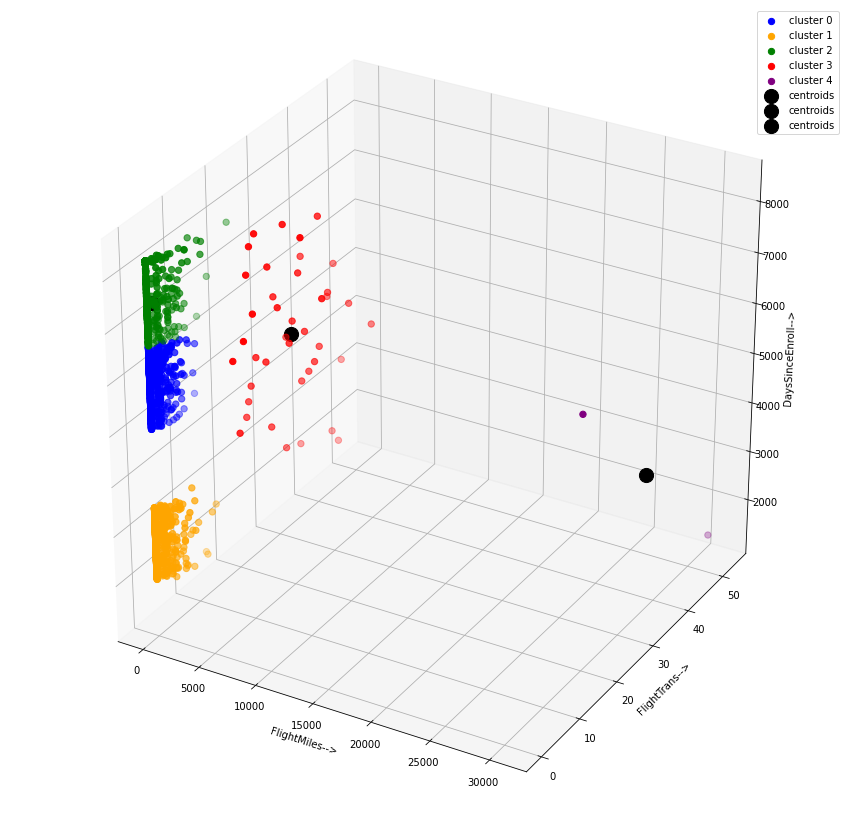

In [94]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[y_clusters == 0,0],X[y_clusters == 0,1],X[y_clusters == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(X[y_clusters == 1,0],X[y_clusters == 1,1],X[y_clusters == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(X[y_clusters == 2,0],X[y_clusters == 2,1],X[y_clusters == 2,2], s = 40 , color = 'green', label = "cluster 2")
ax.scatter(X[y_clusters == 3,0],X[y_clusters == 3,1],X[y_clusters == 3,2], s = 40 , color = 'red', label = "cluster 3")
ax.scatter(X[y_clusters == 4,0],X[y_clusters == 4,1],X[y_clusters == 4,2], s = 40 , color = 'purple', label = "cluster 4")
ax.scatter(model.cluster_centers_[2][0], model.cluster_centers_[2][1], model.cluster_centers_[2][2],  s = 200, c = "black", 
           label = "centroids")

ax.scatter(model.cluster_centers_[4][0], model.cluster_centers_[4][1], model.cluster_centers_[4][2],  s = 200, c = "black", 
           label = "centroids")

ax.scatter(model.cluster_centers_[3][0], model.cluster_centers_[3][1], model.cluster_centers_[3][2],  s = 200, c = "black", 
           label = "centroids")

ax.set_xlabel('FlightMiles-->')
ax.set_ylabel('FlightTrans-->')
ax.set_zlabel('DaysSinceEnroll-->')
ax.legend()
plt.show()